
<h2>Dichotomie récursive</h2>
<p>La recherche dichotomique est assez simple : on part d'une liste triée <i>T</i>
et on cherche l'élément <i>v</i> (on suppose qu'il s'y trouve). 
On procède comme suit :
<ul>
<li>On compare <i>v</i> à l'élément du milieu de la liste.</li>
<li>S'il est égal à <i>v</i>, on a fini.</li>
<li>Sinon, s'il est inférieur, il faut chercher dans la première moitié de la liste.
    On retourne à l'étape 1 avec la liste réduite.</li>
<li>S'il est supérieur, on fait de même avec la seconde moitié de la liste.</li>
</ul>
C'est ce qu'illustre la figure suivante où <i>a</i> désigne le début de la liste,
<i>b</i> la fin, <i>m</i> le milieu. A chaque itération, on déplace ces trois 
positions.
</p>




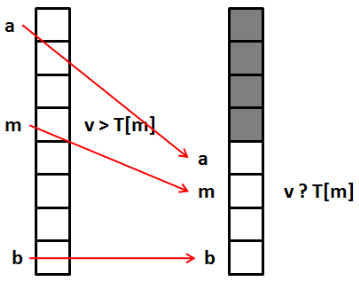

Avant de coder la version récursive, un petit rappel est nécessaire.

A vous de jouer, codez cet algorithme en version itérative :

In [17]:
def recherche_dichotomique( element, liste_triee ):
  a = 0
  b = len(liste_triee) - 1

  m = (a + b) // 2

  while a < b:
    if liste_triee[m] == element:
      return m
    elif liste_triee[m] > element:
      b = m - 1
    else:
      a = m + 1

    m = (a + b) // 2
  
  if liste_triee[m] == element:
    return m

  return None

print(recherche_dichotomique(17, [1, 2, 4, 5, 10, 17, 21]))

5


In [18]:
assert recherche_dichotomique(1,[1,2,3]) == 0
assert recherche_dichotomique(5,[1,2,3]) == None
assert recherche_dichotomique(5,[1,2,3,5,6,7,8]) == 3



# A vous de jouer : écrire une version récursive de cet algorithme.


Dans un premier temps, nous utiliserons 2 paramètres, a et b, qui donnent les bornes de la partie de la liste dans laquelle on recherche. A chaque appel, soit a, soit b, sera modifié, de sorte que b diminue ou a augmente.

Au premier appel, a=0 et b=len(lst) : on considère toute la liste. Ces valeurs seront codées avec des paramètre par défaut. Dans les appels suivants on passera a et b correctement recalculées.

In [61]:
# votre code ici
def dichotomie_recursive(x , lst, a=None,b=None) :
  # au premier appel, a=0 et b=len(lst) car on considère toute la liste :
  if a==None :
    a=0
  if b==None :
    b=len(lst)
  # cas de base : défini le cas trivial et renvoyer la valeur True ou False
  if a == b:
    if (lst[a] == x):
      return a
    else:
      return None

  # cas général : calculer le milieu m, et traiter les 3 cas (lst[m]=x; lst[m]>x; lst[m]<x)
  m = (a+b) // 2

  if lst[m] == x:
    return m
  elif lst[m] > x:
    return dichotomie_recursive(x, lst, a, m-1)
  else:
    return dichotomie_recursive(x, lst, m+1, b)

In [58]:
assert dichotomie_recursive(1,[1,2,3]) == 0
assert dichotomie_recursive(5,[1,2,3]) == None
assert dichotomie_recursive(5,[1,2,3,5,6,7,8]) == 3

IndexError: list index out of range



```
# Ce texte est au format code
```

Version alternative à compléter :

In [64]:
# si vous n'aimez pas les arguments par défaut, vous pouvez procéder ainsi :
def dichotomie_recursive2(x, l) :
 return dicho_rec(x,l,0,len(l) - 1)

def dicho_rec(x , lst, a , b) :
  # cas de base : défini le cas trivial et renvoyer la valeur True ou False
  if a == b:
    if (lst[a] == x):
      return a
    else:
      return None

  # cas général : calculer le milieu m, et traiter les 3 cas (lst[m]=x; lst[m]>x; lst[m]<x)
  m = (a+b) // 2

  if lst[m] == x:
    return m
  elif lst[m] > x:
    return dicho_rec(x, lst, a, m-1)
  else:
    return dicho_rec(x, lst, m+1, b)
 

# Il est possible aussi de procéder d'une autre manière, sans les paramètres a et b, avec le slicing :
 Voyons cela sur un exemple :

 l = [ 1 , 2 , 3 , 4 , 5 ]

 <hr>premier exemple :
 on cherche 4 dans la liste.
<hr>
<pre>
 premier appel : cherche 4 dans [ 1 , 2 , 3 , 4 , 5 ]
 rang de l'élment au milieu : m =  len(lst) // 2 = 2
 la valeur d'indice 2 est 3, qui est inférieure à la valeur cherchée.
 on peut dans ce cas écrire que le rang de la valeur cherché est :<br>
<b> 3 (rang de m + 1)  + position de 4 dans l[m+1:] =[4 , 5]</b>
</pre>

 <hr>Deuxième exemple :  cette fois ci la valeur cherché est 2 :<hr>
 <pre>
 premier appel : cherche 2 dans [ 1 , 2 , 3 , 4 , 5 ]
 rang de l'élment au milieu : m =  len(lst) // 2 = 2
 la valeur d'indice 2 est 3, qui est supérieure à la valeur cherchée.
 on peut écrire que le rang de la valeur cherché est :<br>
 <b>position de 2 dans l[:m]= [1 , 2]</b><hr>
</pre>

 Analysez bien la situation et proposez une seconde implémentation de l'algorithme.<br>
 **Attention** le cas de base renvoie None, donc on ne peux pas additionner m+1+resultat de la fonction, il faut vérifier si ce résultat est None...

In [69]:
#votre code ici
#votre code ici
def dicho(x,L):
    n = len(L)

    if n == 1:
        if L[0] == x:
            return L[0]
        else:
            return None
    else:
        m = n // 2
        if L[m] == x:
            return m
        elif L[m]>x:
            result = dicho(x,L[:m])
            if result == None:
                return None
            else:
                return result
        else:
            result = m+1+dicho(x, L[m+1:])
            if result == None:
                return None
            else:
                return result
    
print(dicho(1,[1,2,3]) )

1


In [ ]:
assert dicho(1,[1,2,3]) == 0
assert dicho(5,[1,2,3]) == None
assert dicho(5,[1,2,3,5,6,7,8]) == 3